In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random
print ("Imported Modules")
%matplotlib qt

Imported Modules


In [2]:
#Loading the images
day_train_dir="img/day_night/training/"
day_test_dir="img/day_night/test/"

In [3]:
mypath_day=day_train_dir+"day/"
onlyfiles_day = [mypath_day+f for f in os.listdir(mypath_day) if os.path.isfile(os.path.join(mypath_day, f))]
onlyfiles_day[0]

'img/day_night/training/day/20151101_142050.jpg'

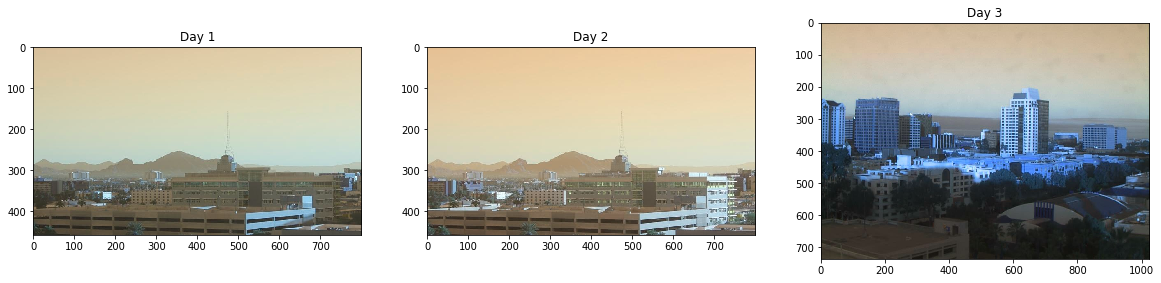

In [4]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Day 1')
ax1.imshow(cv2.imread(onlyfiles_day[0]),cmap='gray')
ax2.set_title('Day 2')
ax2.imshow(cv2.imread(onlyfiles_day[1]),cmap='gray')
ax3.set_title('Day 3')
ax3.imshow(cv2.imread(onlyfiles_day[2]),cmap='gray')


In [5]:
mypath_night=day_train_dir+"night/"
onlyfiles_night = [mypath_night+f for f in os.listdir(mypath_night) if os.path.isfile(os.path.join(mypath_night, f))]

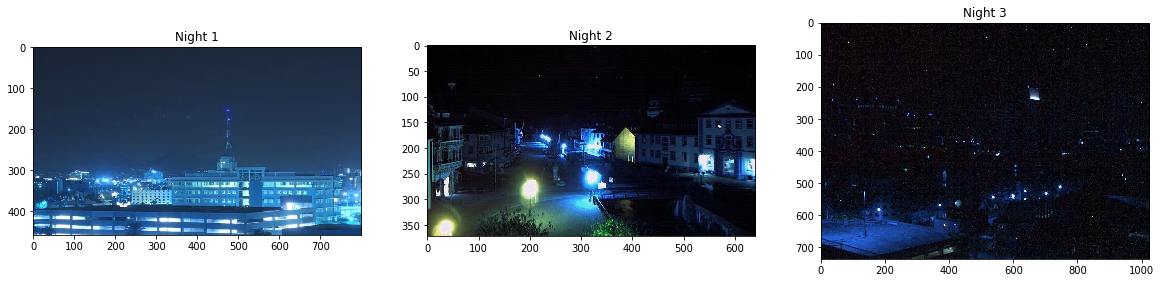

In [6]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,10))
ax1.set_title('Night 1')
ax1.imshow(cv2.imread(onlyfiles_night[50]),cmap='gray')
ax2.set_title('Night 2')
ax2.imshow(cv2.imread(onlyfiles_night[11]),cmap='gray')
ax3.set_title('Night 3')
ax3.imshow(cv2.imread(onlyfiles_night[7]),cmap='gray')

In [7]:
def resizing_image(img):
#     img=cv2.imread(img)
    return(cv2.resize(img,(1100,600)))
# resizing_image(onlyfiles_day[0])

In [8]:
def encode(label):        
    if label == "day":
        numerical_val = 1
    elif label == "night":
        numerical_val = 0
        
    return numerical_val

In [9]:
def standardize(image_list,typ):
    
    # Empty image data array
    standard_list = []

    # Iterate through all the image-label pairs
    for item in image_list:
        image = cv2.imread(item)
        label = typ

        # Standardize the image
        
        standardized_im = resizing_image(image)

        # Create a numerical label
        binary_label = encode(label)    

        # Append the image, and it's one hot encoded label to the full, processed list of image data 
        standard_list.append((standardized_im, binary_label))
        
    return standard_list

# Standardize all training images
STANDARDIZED_LIST=[0]*2
STANDARDIZED_LIST[1] = standardize(onlyfiles_day,"day")
STANDARDIZED_LIST[0] = standardize(onlyfiles_night,"night")

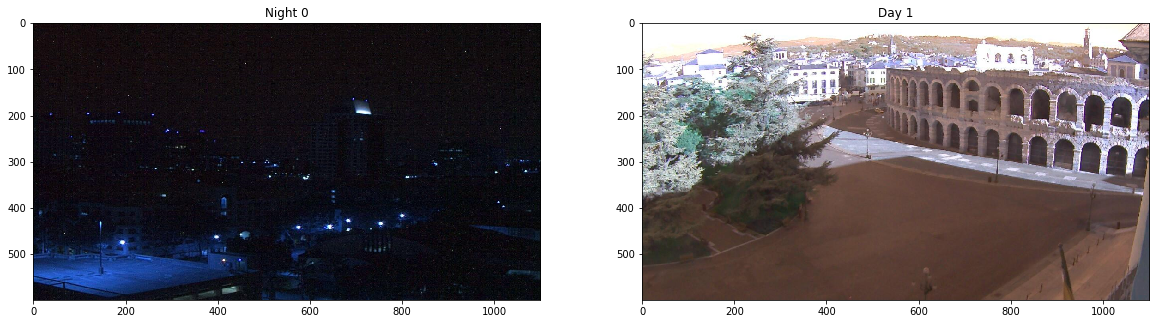

In [10]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('Night 0')
ax1.imshow((STANDARDIZED_LIST[0][10][0]))
ax2.set_title('Day 1')
ax2.imshow((STANDARDIZED_LIST[1][60][0]))


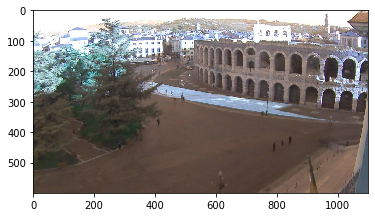

In [11]:
plt.imshow(STANDARDIZED_LIST[1][50][0])

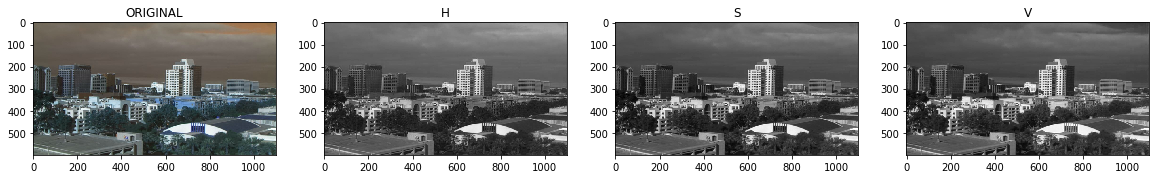

In [12]:
test=STANDARDIZED_LIST[1][7][0]
test_hsv=cv2.cvtColor(test,cv2.COLOR_BGR2HSV)
f,(ax1,ax2,ax3,ax4)=plt.subplots(1,4, figsize=(20,10))
ax1.set_title('ORIGINAL')
ax1.imshow(test)
ax2.set_title('H')
ax2.imshow(test[:,:,0],cmap="gray")
ax3.set_title('S')
ax3.imshow(test[:,:,1],cmap="gray")
ax4.set_title('V')
ax4.imshow(test[:,:,2],cmap="gray")


In [13]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    
    ## TODO: Calculate the average brightness using the area of the image
    # and the sum calculated above
    area=1100*600
    
    avg = sum_brightness/area
    
    return avg

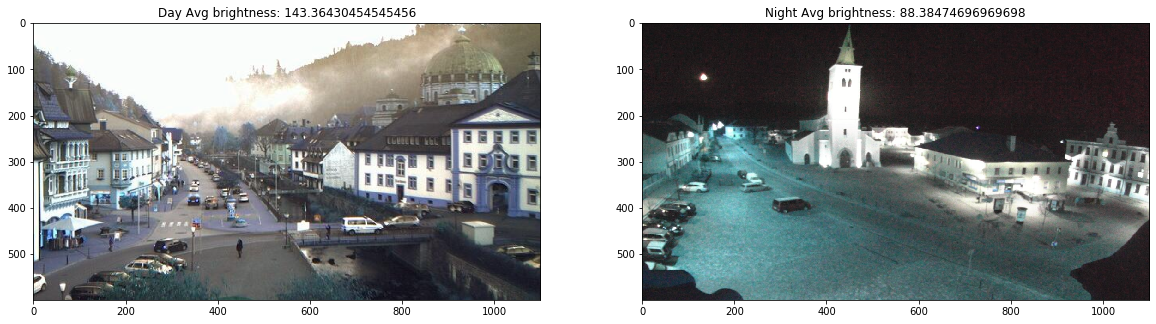

In [14]:
image_num = 100
test_im_night = STANDARDIZED_LIST[0][image_num][0]
test_im_day = STANDARDIZED_LIST[1][image_num][0]
avg_n = avg_brightness(test_im_night)
avg_d = avg_brightness(test_im_day)
f,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
ax1.set_title('Day Avg brightness: ' + str(avg_d))
ax1.imshow(test_im_day)
ax2.set_title('Night Avg brightness: ' + str(avg_n))
ax2.imshow(test_im_night)


In [15]:
# This function should take in RGB image input
def estimate_label(rgb_image):
    
    # Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
    
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0
    
    
    # Set the value of a threshold that will separate day and night images
    threshold = 100
    #print(threshold)
    ## Return the predicted_label (0 or 1) based on whether the avg is 
    # above or below the threshold
    
    if avg > threshold:
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")

    return predicted_label

In [16]:
estimate_label(STANDARDIZED_LIST[0][0][0])

0

In [17]:
mypath_day_test=day_test_dir+"day/"
onlyfiles_day_test = [mypath_day_test+f for f in os.listdir(mypath_day_test) if os.path.isfile(os.path.join(mypath_day_test, f))]
onlyfiles_day_test

['img/day_night/test/day/20151101_152050.jpg',
 'img/day_night/test/day/20151101_152512.jpg',
 'img/day_night/test/day/20151101_165048.jpg',
 'img/day_night/test/day/20151101_222053.jpg',
 'img/day_night/test/day/20151101_225048.jpg',
 'img/day_night/test/day/20151101_232057.jpg',
 'img/day_night/test/day/20151101_235039.jpg',
 'img/day_night/test/day/20151102_002051.jpg',
 'img/day_night/test/day/20151102_005050.jpg',
 'img/day_night/test/day/20151102_055603.jpg',
 'img/day_night/test/day/20151102_060941.jpg',
 'img/day_night/test/day/20151102_061450.jpg',
 'img/day_night/test/day/20151102_062005.jpg',
 'img/day_night/test/day/20151102_062454.jpg',
 'img/day_night/test/day/20151102_071409.jpg',
 'img/day_night/test/day/20151102_074010.jpg',
 'img/day_night/test/day/20151102_074127.jpg',
 'img/day_night/test/day/20151102_074413.jpg',
 'img/day_night/test/day/20151102_075215.jpg',
 'img/day_night/test/day/20151102_081120.jpg',
 'img/day_night/test/day/20151102_081417.jpg',
 'img/day_nig

In [18]:
mypath_night_test=day_test_dir+"night/"
onlyfiles_night_test = [mypath_night_test+f for f in os.listdir(mypath_night_test) if os.path.isfile(os.path.join(mypath_night_test, f))]
onlyfiles_night_test

['img/day_night/test/night/20151101_072507.jpg',
 'img/day_night/test/night/20151101_230938.jpg',
 'img/day_night/test/night/20151101_231132.jpg',
 'img/day_night/test/night/20151101_231455.jpg',
 'img/day_night/test/night/20151101_232014.jpg',
 'img/day_night/test/night/20151101_232440.jpg',
 'img/day_night/test/night/20151102_001123.jpg',
 'img/day_night/test/night/20151102_002549.jpg',
 'img/day_night/test/night/20151102_003534.jpg',
 'img/day_night/test/night/20151102_004042.jpg',
 'img/day_night/test/night/20151102_004129.jpg',
 'img/day_night/test/night/20151102_005319.jpg',
 'img/day_night/test/night/20151102_010806.jpg',
 'img/day_night/test/night/20151102_011044.jpg',
 'img/day_night/test/night/20151102_011134.jpg',
 'img/day_night/test/night/20151102_012545.jpg',
 'img/day_night/test/night/20151102_013807.jpg',
 'img/day_night/test/night/20151102_015324.jpg',
 'img/day_night/test/night/20151102_021044.jpg',
 'img/day_night/test/night/20151102_022319.jpg',
 'img/day_night/test

In [19]:

test_images=standardize(onlyfiles_day_test,"day")+standardize(onlyfiles_night_test,"night")

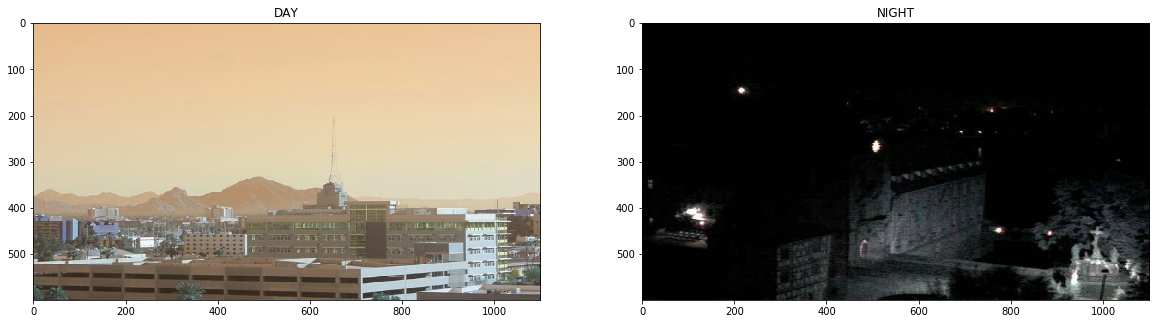

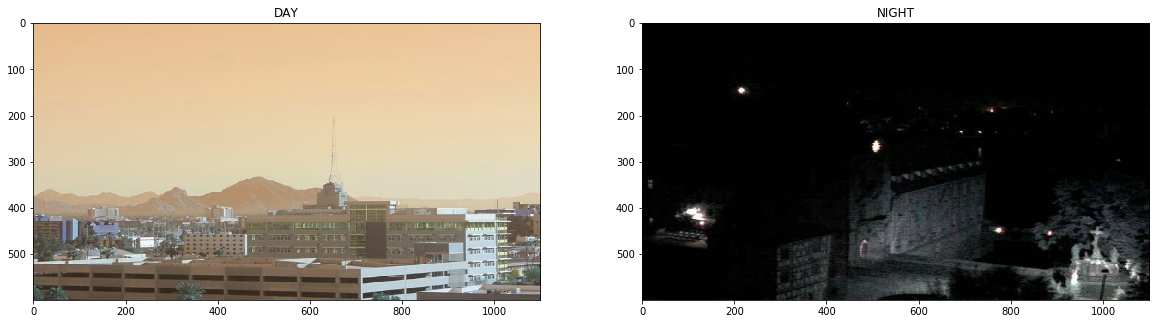

In [20]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('DAY')
ax1.imshow(test_images[0][0])
ax2.set_title('NIGHT')
ax2.imshow(test_images[90][0])
f

In [21]:
random.shuffle(test_images)

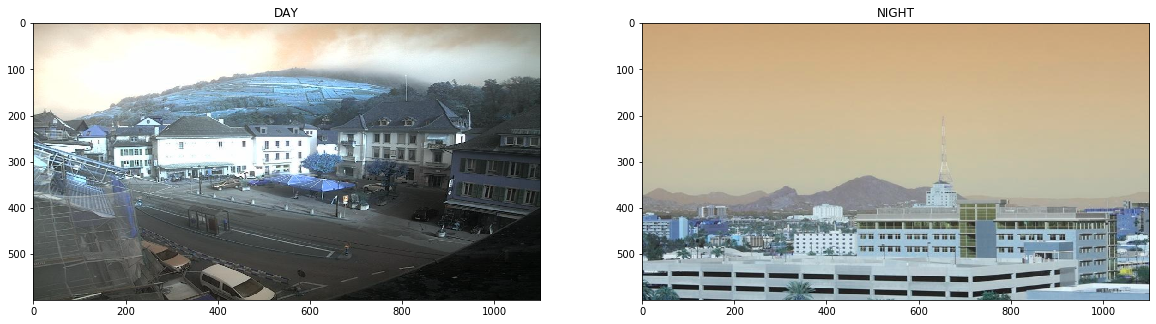

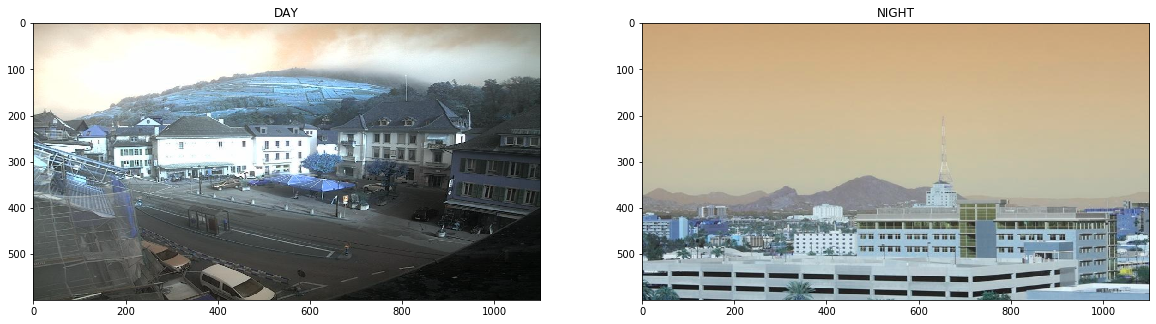

In [22]:

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
ax1.set_title('DAY')
ax1.imshow(test_images[0][0])
ax2.set_title('NIGHT')
ax2.imshow(test_images[90][0])
f

In [23]:
def get_misclassified_images(test_images):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels

In [24]:
# STANDARDIZED_TEST_LIST=standardize(test_images)
wrong=len(get_misclassified_images(test_images))

In [25]:
total=len(test_images)

In [28]:
print ("The accuracy of the model is",((total-wrong)/total)*100)

The accuracy of the model is 92.5


In [29]:
wrong,total


(12, 160)